#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
normal_data = pd.read_csv(os.getcwd() + '/Data/brain_tumour_normalized.csv')
normal_data.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
0,Image1,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0,0
1,Image2,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0,0
2,Image3,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0,1
3,Image4,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0,1
4,Image5,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0,0


In [3]:
X, Y = normal_data[normal_data.columns[1 : 14]], normal_data[normal_data.columns[-1]]
X.shape, Y.shape

((3762, 13), (3762,))

#### Logistic Regression

Without repeated folds:

In [4]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [5]:
logisticRegr = LogisticRegression()  # create model

scores = cross_val_score(logisticRegr, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

In [6]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 97.76736836164571
Overall std. dev. of scores: 0.00571257777793943


With repeated folds:

In [7]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [8]:
logisticRegr = LogisticRegression()  # create model

scores = cross_val_score(logisticRegr, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

In [9]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 97.76713320917281
Overall std. dev. of scores: 0.006159991467893768


#### SVM - RBF Kernel

Without repeated folds:

In [10]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [11]:
svm_rbf = SVC(kernel = 'rbf', gamma = 'auto')  # create model

scores = cross_val_score(svm_rbf, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

In [12]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 97.36871437440037
Overall std. dev. of scores: 0.006099179752415618


With repeated folds:

In [13]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [14]:
svm_rbf = SVC(kernel = 'rbf', gamma = 'auto')  # create model

scores = cross_val_score(svm_rbf, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

In [15]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 97.32408243505087
Overall std. dev. of scores: 0.006544625993357317


#### SVM - Sigmoid Kernel

Without repeated folds:

In [16]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [17]:
svm_sigmoid = SVC(kernel = 'sigmoid', gamma = 'auto')  # create model

scores = cross_val_score(svm_sigmoid, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

In [18]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 96.99658558609403
Overall std. dev. of scores: 0.007416498502075566


With repeated folds:

In [19]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [20]:
svm_sigmoid = SVC(kernel = 'sigmoid', gamma = 'auto')  # create model

scores = cross_val_score(svm_sigmoid, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

In [21]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 97.00514513610624
Overall std. dev. of scores: 0.007028382236675999


#### SVM - Linear Kernel

Without repeated folds:

In [22]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [23]:
svm_linear = SVC(kernel = 'linear', gamma = 'auto')  # create model

scores = cross_val_score(svm_linear, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

In [24]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 97.7940346520684
Overall std. dev. of scores: 0.005691111741719891


With repeated folds:

In [25]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [26]:
svm_linear = SVC(kernel = 'linear', gamma = 'auto')  # create model

scores = cross_val_score(svm_linear, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

In [27]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 97.81152999604943
Overall std. dev. of scores: 0.006384816120426538


Other classifiers to add: GaussianProcessClassifier, MLPClassifier, RandomForestClassifier, AdaBoostClassifier, XGBoost

#### Decision Tree

Finding optimal depth and tree:

In [28]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

scores_list, scores_mean, scores_std = [], [], []

depth_range = [i for i in range(1, 21)]  # depth of the trees

for depth in depth_range:
    dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = depth)  # create model based on Gini impurity
    
    scores = cross_val_score(dTree, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy
    
    scores_list.append(scores)
    scores_mean.append(scores.mean())
    scores_std.append(scores.std())

Plotting:

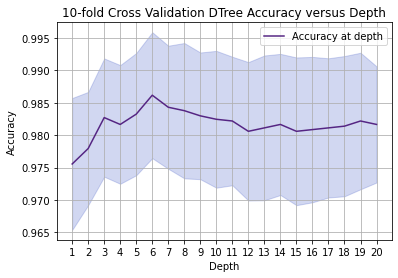

In [29]:
scores_mean, scores_std = np.array(scores_mean), np.array(scores_std)

plt.plot(depth_range, scores_mean, color = '#552583', label = 'Accuracy at depth')
plt.fill_between(depth_range, scores_mean - 1.5 * scores_std, scores_mean + 1.5 * scores_std, color = '#1c39bb', alpha = 0.2)
plt.xticks(depth_range)
plt.grid()
plt.legend()
plt.title('10-fold Cross Validation DTree Accuracy versus Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()
plt.close()

In [30]:
max_idx = scores_mean.argmax()

print('Highest accuracy:', scores_mean[max_idx] * 100)
print('Corresponding std. dev.:', scores_std[max_idx])
print('Optimal depth:', depth_range[max_idx])

Highest accuracy: 98.61793837123992
Corresponding std. dev.: 0.00648784488343582
Optimal depth: 6


#### Naive Bayes

Without repeated folds:

In [31]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [32]:
naiveBayes = GaussianNB()  # create model

scores = cross_val_score(naiveBayes, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

In [33]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 96.67757774140753
Overall std. dev. of scores: 0.0066257507165831675


With repeated folds:

In [34]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [35]:
naiveBayes = GaussianNB()  # create model

scores = cross_val_score(naiveBayes, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

In [36]:
print('Overall accuracy:', scores.mean() * 100)
print('Overall std. dev. of scores:', scores.std())

Overall accuracy: 96.66847734070771
Overall std. dev. of scores: 0.00839503195695032
